In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_treated.pkl'))

df = df.dropna()
print(len(df))
df.head()

68252


,correcao_licao_casa,faz_licao_casa,pai_le,pretensao_futura,reprovacao,tempo_trabalho_domestico,possui_tv,pai_sabe_ler_escrever,frequenta_espetaculo_exposicao,desempenho_aluno,...,utiliza_biblioteca_escola,responsaveis_comparecem_reuniao_pais,escola_publica,inicio_estudos,gosta_estudar_disciplina,leitura_historia_quadrinhos,frequenta_cinema,responsaveis_incentivam_comparecer_aulas,disciplina,desempenho_aluno_cat
26050,1.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,Básico,...,1.0,2.0,1,1.0,1.0,0.0,0.0,1.0,MT,1
26059,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,Proficiente,...,1.0,2.0,1,1.0,0.0,0.0,0.0,1.0,LP,2
26064,2.0,2.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,Básico,...,1.0,2.0,1,0.0,1.0,2.0,0.0,1.0,LP,1
26065,2.0,2.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,Básico,...,1.0,2.0,1,0.0,1.0,2.0,0.0,1.0,MT,1
26068,2.0,2.0,1.0,2.0,0.0,1.0,3.0,1.0,1.0,Básico,...,1.0,2.0,1,0.0,1.0,0.0,0.0,1.0,MT,1


In [22]:
#df = df[df['disciplina'] == 'LP']
#print(len(df))

In [23]:
mediana = df['proficiencia'].median()

df['target'] = df['proficiencia'].apply(lambda x: 1 if x >= mediana else 0)

In [24]:
df['target'].value_counts()

target
1    34126
0    34126
Name: count, dtype: int64

In [25]:
df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,desempenho_aluno_cat
count,68252.000000,68252.000000
mean,-0.110087,0.939855
std,0.827581,0.731896
min,-2.458611,0.000000
25%,-0.700938,0.000000
50%,-0.118902,1.000000
75%,0.464743,1.000000
max,3.214629,3.000000


In [26]:
print(df.columns)

Index(['correcao_licao_casa', 'faz_licao_casa', 'pai_le', 'pretensao_futura',
       'reprovacao', 'tempo_trabalho_domestico', 'possui_tv',
       'pai_sabe_ler_escrever', 'frequenta_espetaculo_exposicao',
       'desempenho_aluno', 'leitura_revista_comportamento',
       'possui_computador', 'raca_cor', 'responsaveis_conversam_escola',
       'leitura_jornais', 'turno', 'responsaveis_incentivam_leitura',
       'proficiencia', 'escolaridade_pai', 'frequenta_biblioteca',
       'evasao_escolar_ate_final_ano', 'leitura_revistas_geral',
       'responsaveis_incentivam_realizacao_licao_casa', 'mae_le', 'id_aluno',
       'idade', 'responsaveis_incentivam_estudos', 'possui_trabalho',
       'mae_sabe_ler_escrever', 'leitura_internet', 'proficiencia_saeb',
       'erro_padrao', 'sexo', 'leitura_literatura_infantojuvenil',
       'frequenta_festas_comunidade', 'tempo_lazer', 'ano_nascimento',
       'leitura_livros_geral', 'escolaridade_mae', 'erro_padrao_saeb', 'ano',
       'utiliza_biblio

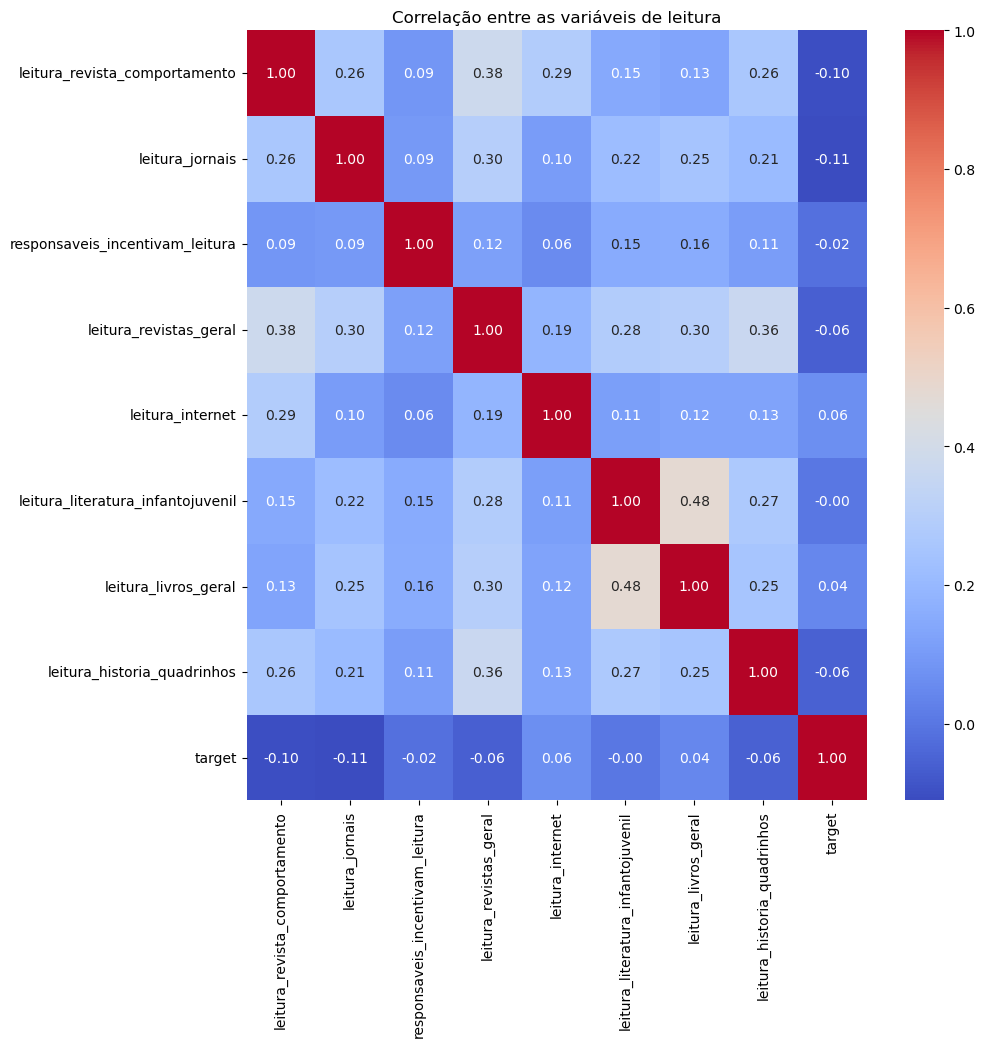

In [27]:
# selecionando colunas de leitura
columns_oi = [col for col in df.columns if 'leitura' in col] + ['target']

# correlação entre as colunas
correlation = df[columns_oi].corr()

# plotando o heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre as variáveis de leitura')
plt.show()

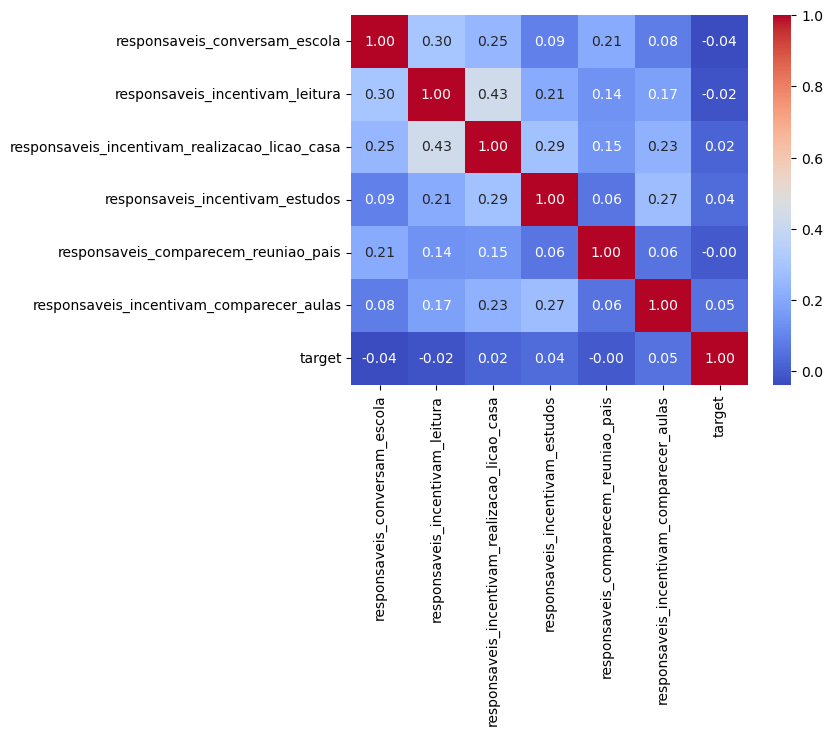

<Figure size 1000x1000 with 0 Axes>

In [28]:
# colunas responsaveis_

columns_oi = [col for col in df.columns if 'responsaveis_' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

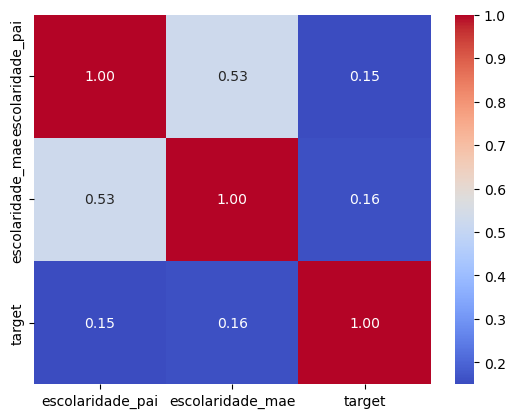

<Figure size 1000x1000 with 0 Axes>

In [29]:
# colunas de escolaridade_mae e escolaridade_mae

columns_oi = [col for col in df.columns if 'escolaridade_mae' in col or 'escolaridade_pai' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

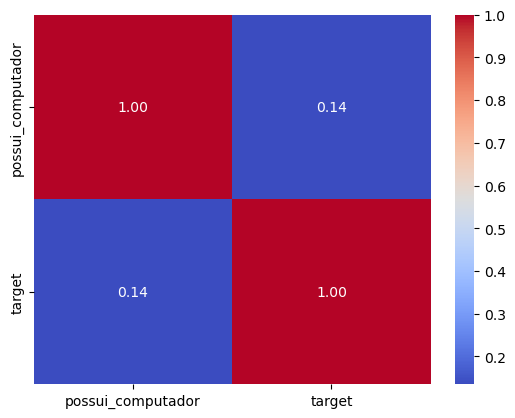

<Figure size 1000x1000 with 0 Axes>

In [30]:
# coluna possui_computador

columns_oi = [col for col in df.columns if 'possui_computador' in col] + ['target']

corr = df[columns_oi].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

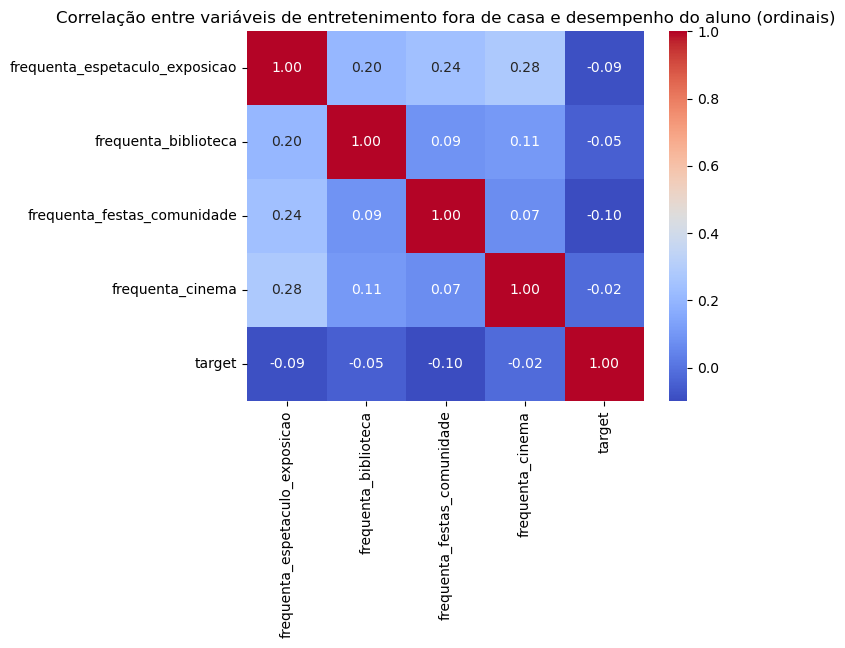

<Figure size 1000x1000 with 0 Axes>

In [31]:
# colunas 'frequenta_'

columns_oi = [col for col in df.columns if 'frequenta_' in col] + ['target']

corr = df[columns_oi].corr()
plt.title('Correlação entre variáveis de entretenimento fora de casa e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

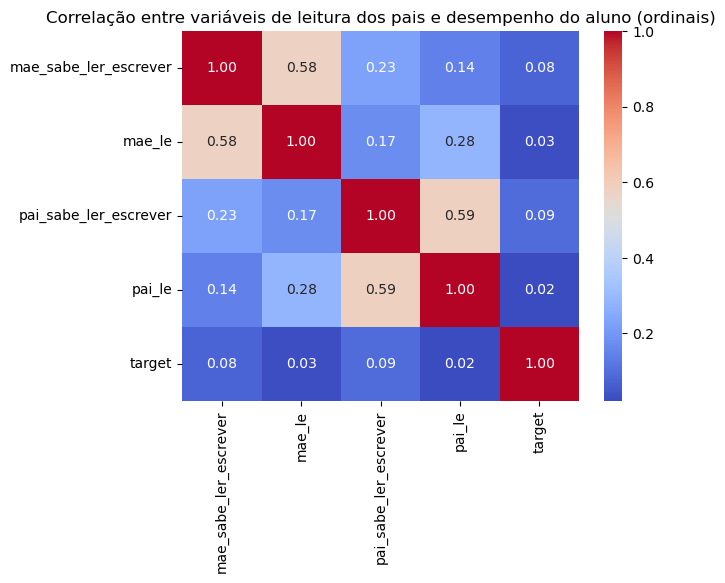

<Figure size 1000x1000 with 0 Axes>

In [32]:
# colunas de leitura dos pais (nível de escolaridade)

columns_oi = ['mae_sabe_ler_escrever', 'mae_le', 'pai_sabe_ler_escrever', 'pai_le'] + ['target']

corr = df[columns_oi].corr()
plt.title('Correlação entre variáveis de leitura dos pais e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

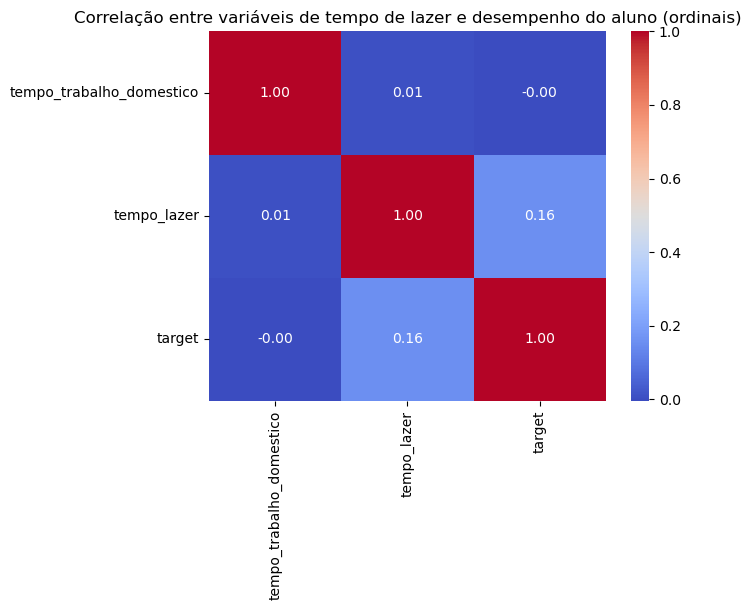

<Figure size 1000x1000 with 0 Axes>

In [33]:
columns_oi_lazer = [col for col in df.columns if 'tempo_' in col] + ['target']

corr = df[columns_oi_lazer].corr()
plt.title('Correlação entre variáveis de tempo de lazer e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

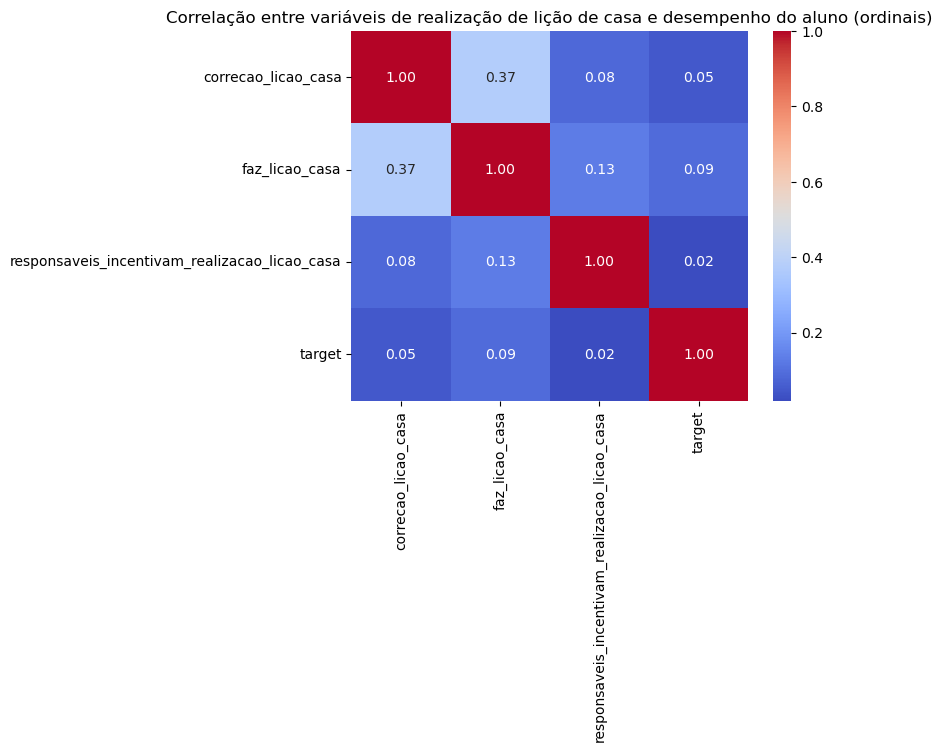

<Figure size 1000x1000 with 0 Axes>

In [34]:
columns_oi_licao = [col for col in df.columns if 'licao_casa' in col] + ['target']

corr = df[columns_oi_licao].corr()
plt.title('Correlação entre variáveis de realização de lição de casa e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

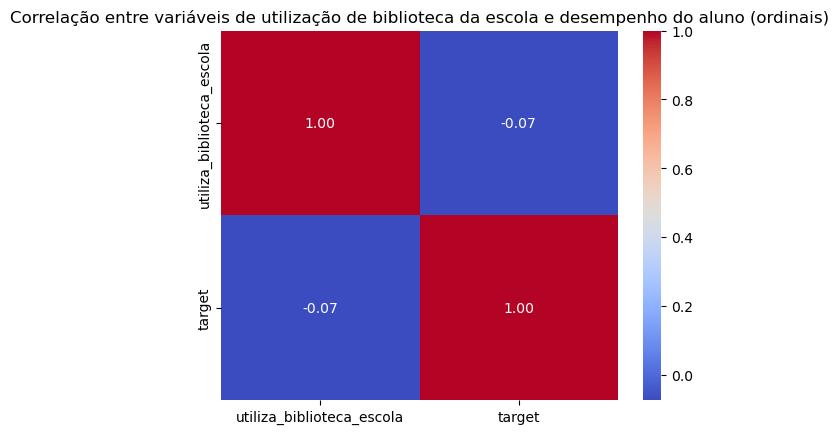

<Figure size 1000x1000 with 0 Axes>

In [35]:
columns_oi_bilioteca = [col for col in df.columns if 'utiliza_biblioteca_escola' in col] + ['target']

corr = df[columns_oi_bilioteca].corr()
plt.title('Correlação entre variáveis de utilização de biblioteca da escola e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

Index(['pai_le', 'pretensao_futura', 'reprovacao', 'possui_tv',
       'pai_sabe_ler_escrever', 'evasao_escolar_ate_final_ano', 'mae_le',
       'idade', 'possui_trabalho', 'mae_sabe_ler_escrever', 'inicio_estudos',
       'gosta_estudar_disciplina', 'desempenho_aluno_cat', 'target'],
      dtype='object')


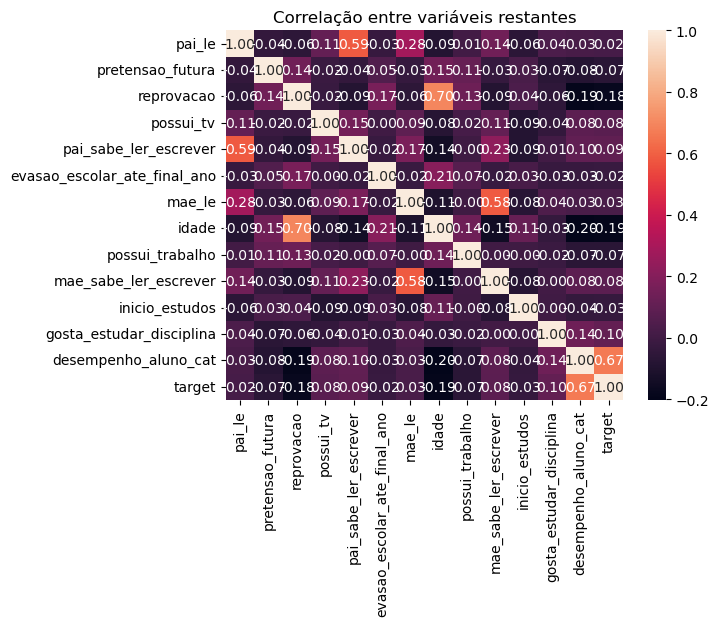

<Figure size 2000x2000 with 0 Axes>

In [37]:
# heatmap for columns relationship
exclude = ['ano', 'escola_publica', 'id_aluno',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento']

exclude += [col for col in df.columns if 'leitura_' in col]
exclude += [col for col in df.columns if 'responsaveis_' in col]
exclude += [col for col in df.columns if 'frequenta_' in col]
exclude += ['turno']
exclude += [col for col in df.columns if 'tempo_' in col]
exclude += [col for col in df.columns if 'faz_licao_casa' in col]
exclude += [col for col in df.columns if 'correcao_licao_casa' in col]
exclude += [col for col in df.columns if 'utiliza_biblioteca_escola' in col]
exclude += [col for col in df.columns if 'escolaridade_mae' in col or 'escolaridade_pai' in col]
exclude += ['possui_computador']

print(df.drop(exclude, axis=1).columns)

corr = df.drop(exclude, axis=1).corr()
plt.title('Correlação entre variáveis restantes')
sns.heatmap(corr, annot=True, fmt=".2f")
plt.figure(figsize=(20, 20))
plt.show()